In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [4]:
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [5]:
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [6]:
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [7]:
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [8]:
simple_test = ["please don't call me"]

In [9]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [10]:
pd.DataFrame(simple_test_dtm.toarray(), columns = vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [11]:
sms = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')

# any는 default값, Nan 하나라도 있으면 drop
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
sms.label.map({'ham' : 0, 'spam' : 1})

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [15]:
sms['label_num'] = sms.label.map({'ham' : 0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [16]:
sms['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
sms.message.apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5572, dtype: int64

In [18]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

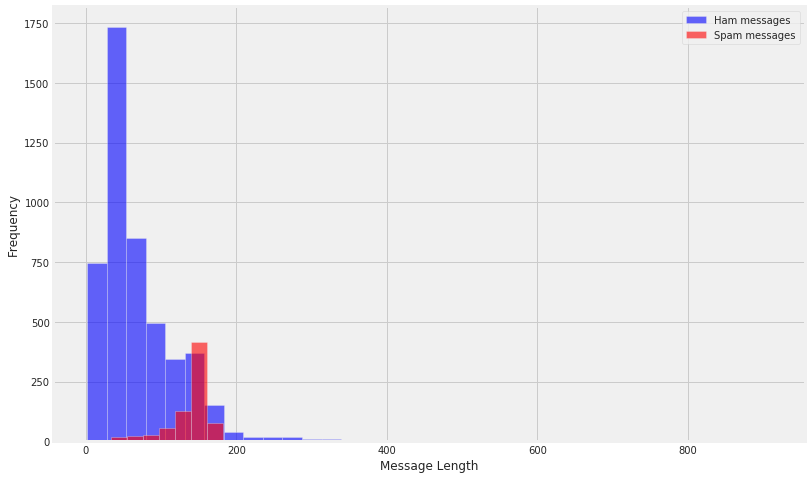

In [19]:
plt.figure(figsize = (12 , 8))
sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', label= 'Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)

plt.legend()
plt.xlabel('Message Length')

In [20]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


# text 전처리

In [21]:
import string
from nltk.corpus import stopwords

In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']


In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
mess = 'i am a (tesache)'

In [26]:
nopunc = [char for char in mess if char not in string.punctuation]
nopunc

['i', ' ', 'a', 'm', ' ', 'a', ' ', 't', 'e', 's', 'a', 'c', 'h', 'e']

In [27]:
nopunc = ''.join(nopunc)
nopunc

'i am a tesache'

In [28]:
def text_process(mess):

    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [29]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [30]:
sms.message.apply(text_process)

0       Go jurong point crazy Available bugis n great ...
1                                   Ok lar Joking wif oni
2       Free entry wkly comp win FA Cup final tkts 21s...
3                         dun say early hor c already say
4                  Nah think goes usf lives around though
                              ...                        
5567    2nd time tried contact å£750 Pound prize claim...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: message, Length: 5572, dtype: object

In [31]:
sms['clean_msg'] = sms.message.apply(text_process)
sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [32]:
from collections import Counter

In [33]:
sms[sms.label=='ham'].clean_msg

0       Go jurong point crazy Available bugis n great ...
1                                   Ok lar Joking wif oni
3                         dun say early hor c already say
4                  Nah think goes usf lives around though
6          Even brother like speak treat like aids patent
                              ...                        
5565                                              Huh lei
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: clean_msg, Length: 4825, dtype: object

In [34]:
words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])

In [35]:
words

0       [go, jurong, point, crazy, available, bugis, n...
1                             [ok, lar, joking, wif, oni]
3                 [dun, say, early, hor, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
6       [even, brother, like, speak, treat, like, aids...
                              ...                        
5565                                           [huh, lei]
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: clean_msg, Length: 4825, dtype: object

In [36]:
ham_words = Counter()

In [37]:
for msg in words:
    ham_words.update(msg)

In [38]:
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [39]:
sms[sms.label=='spam'].clean_msg.apply(lambda x : [x.lower() for x in x.split()])

2       [free, entry, wkly, comp, win, fa, cup, final,...
5       [freemsg, hey, darling, 3, weeks, word, back, ...
8       [winner, valued, network, customer, selected, ...
9       [mobile, 11, months, r, entitled, update, late...
11      [six, chances, win, cash, 100, 20000, pounds, ...
                              ...                        
5537    [want, explicit, sex, 30, secs, ring, 02073162...
5540    [asked, 3mobile, 0870, chatlines, inclu, free,...
5547    [contract, mobile, 11, mnths, latest, motorola...
5566    [reminder, o2, get, 250, pounds, free, call, c...
5567    [2nd, time, tried, contact, å£750, pound, priz...
Name: clean_msg, Length: 747, dtype: object

In [40]:
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [41]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.clean_msg
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

print(X_train.shape)
print(y_train.shape)

(4179,)
(4179,)


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [46]:
X_train_dtm = vect.transform(X_train)

In [47]:
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [48]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 9971 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
nb = MultinomialNB()

In [51]:
%time nb.fit(X_train_dtm, y_train)

CPU times: user 3.86 ms, sys: 1.3 ms, total: 5.16 ms
Wall time: 12.7 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
y_pred_class = nb.predict(X_test_dtm)

In [53]:
y_pred_class

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9827709978463748

In [55]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1205,    8],
       [  16,  164]])

In [56]:
y_pred_class 

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
y_test

1078    0
4028    0
958     0
4642    0
4674    1
       ..
3207    0
4655    0
1140    0
1793    0
1710    0
Name: label_num, Length: 1393, dtype: int64

In [58]:
X_test[y_pred_class >y_test]

2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   Customer place call
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
759     Call youcarlos isare phones vibrate acting mig...
3140                                  Customer place call
Name: clean_msg, dtype: object

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [60]:
pipe = Pipeline(
                [
                    ('bow', CountVectorizer()),
                    ('tfid', TfidfTransformer()),
                    ('model', MultinomialNB())
                ]
                )

In [61]:
pipe

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfid',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [62]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfid',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [63]:
y_pred = pipe.predict(X_test)

In [64]:
metrics.accuracy_score(y_test, y_pred)

0.9669777458722182

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [66]:
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 48.2 ms, sys: 2.92 ms, total: 51.1 ms
Wall time: 27.7 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [68]:
logreg.predict_proba(X_test_dtm)[:]

array([[0.98305582, 0.01694418],
       [0.9847818 , 0.0152182 ],
       [0.91738245, 0.08261755],
       ...,
       [0.97801058, 0.02198942],
       [0.99468274, 0.00531726],
       [0.99320812, 0.00679188]])

In [69]:
logreg.predict_proba(X_test_dtm)[:,1]

array([0.01694418, 0.0152182 , 0.08261755, ..., 0.02198942, 0.00531726,
       0.00679188])

In [70]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.01694418, 0.0152182 , 0.08261755, ..., 0.02198942, 0.00531726,
       0.00679188])

In [71]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9842067480258435

In [72]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1213,    0],
       [  22,  158]])

In [73]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [74]:
submission = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [75]:
test = pd.read_csv('../input/nlp-getting-started/test.csv')
test.shape

(3263, 4)

In [76]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [77]:
test['clean_text'] = test['text'].apply(text_process)

In [78]:
test.head()

,id,keyword,location,text,clean_text
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Heard earthquake different cities stay safe ev...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 China Taiwan


In [79]:
test.dropna(how="any", inplace=True, axis=1)

In [80]:
pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
X_test

1078                                       Convey regards
4028                         Û anyway many good evenings
958     sort code acc bank natwest reply confirm ive s...
4642                                Sorry din lock keypad
4674    Hi babe Chloe r smashed saturday night great w...
                              ...                        
3207     Oops phone died didnt even know Yeah like better
4655                                 K Ill work something
1140                      Ohas usual vijay film different
1793                              bad girl still remember
1710        promises though havent even gotten dinner yet
Name: clean_msg, Length: 1393, dtype: object

In [82]:
test['clean_text']

0                             happened terrible car crash
1       Heard earthquake different cities stay safe ev...
2       forest fire spot pond geese fleeing across str...
3                   Apocalypse lighting Spokane wildfires
4                  Typhoon Soudelor kills 28 China Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm RI worse last hurricane cityamp3others h...
3260      Green Line derailment Chicago httptcoUtbXLcBIuY
3261    MEG issues Hazardous Weather Outlook HWO httpt...
3262    CityofCalgary activated Municipal Emergency Pl...
Name: clean_text, Length: 3263, dtype: object

In [83]:
pipe.predict(test['clean_text'])

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [85]:
y_pred = pipe.predict(test['clean_text'])

In [86]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
submission['target'] = y_pred

In [88]:
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [89]:
submission.to_csv("submission.csv", index=False)